In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

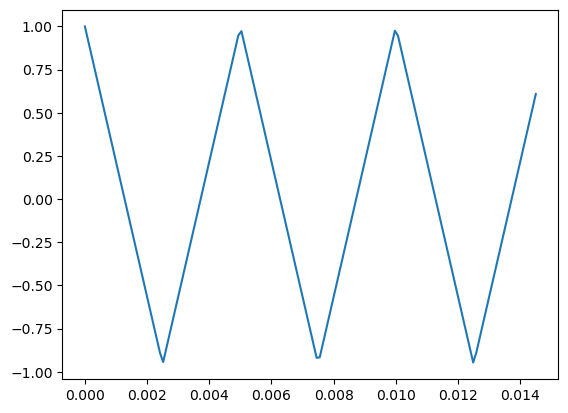

In [21]:
class Sinusoid:
    def __init__(self, freq=440, amp=1, framerate = 44000, offset=0):
        self.freq = freq
        self.amp = amp
        self.framerate = framerate
        self.offset = offset
        self.ys = []
        self.ts = []

    def normalize(self):
        self.ys = self.ys - self.ys.mean()
        high = abs(max(self.ys))
        low = abs(min(self.ys))
        return self.amp*self.ys/max(high,low)

    def get_fft(self):
        

class TriangleSignal(Sinusoid):
    def evaluate(self, ts):
        self.ts = ts
        cycles = self.freq * self.ts + self.offset/(2*np.pi)
        frac, _ = np.modf(cycles)
        self.ys = np.abs(frac - 0.5)
        return self.ys

a = TriangleSignal(freq=200)
framerate = 10000
start_time = 0
end_time = 0.0145
b = np.linspace(start_time,end_time,int(framerate*(end_time-start_time)))
c = a.evaluate(b)
c = a.normalize()
plt.plot(b,c)